<a href="https://colab.research.google.com/github/AnamAtr/Exploratory-Data-Analysis-EDA-/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Titanic_cleaned_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   Siblings     891 non-null    int64  
 7   Pearent      891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
df.describe()

,PassengerId,Sex,Age,Siblings,Pearent,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.647587,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


            Target Variable Distribution           


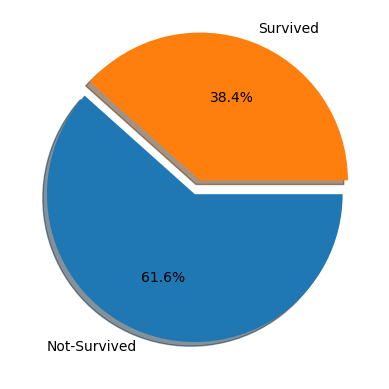

In [ ]:

# Define 'target' and 'labels'
target = 'Survived'
labels = ['Not-Survived', 'Survived']
MAP={}
for e, i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True,
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

                               Visualising Categorical Features:                                


<ipython-input-27-a8be56905727>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


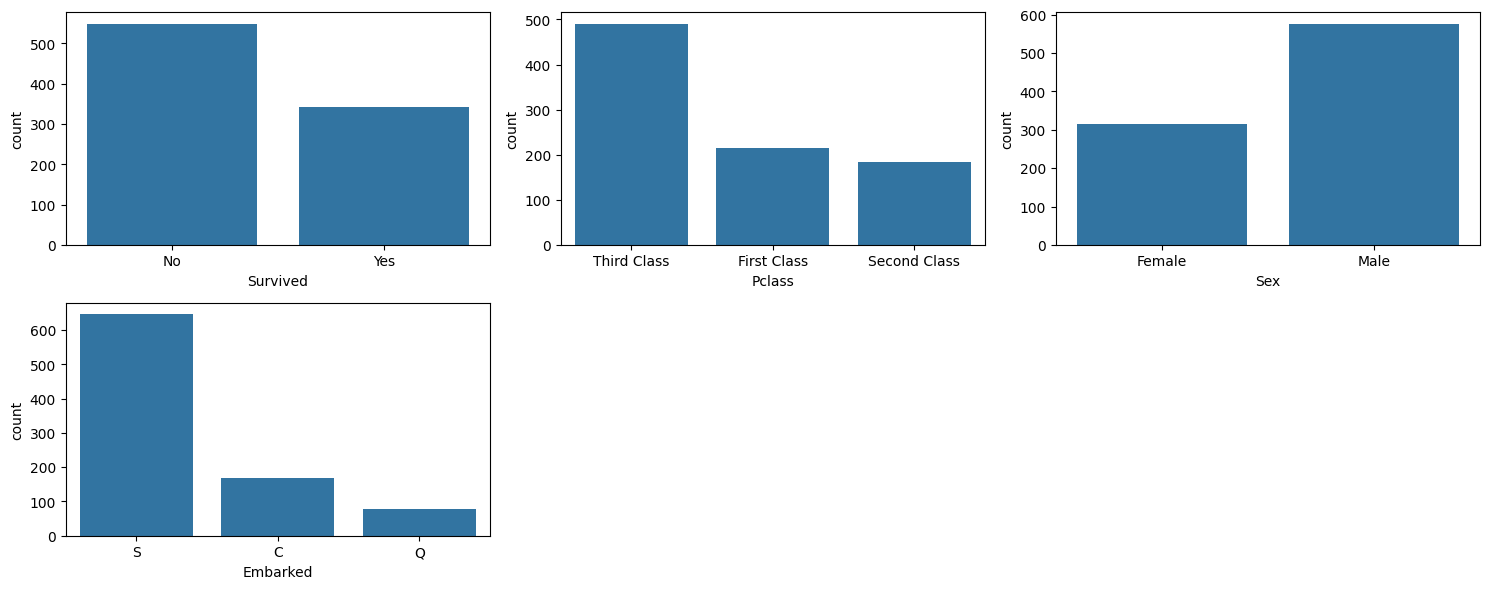

In [ ]:
print('\033[1mVisualising Categorical Features:'.center(100))

import math  # Import the math module

# Define categorical features (cf)
cf = ['Survived', 'Pclass', 'Sex', 'Embarked'] # Assuming these are your categorical features

n = 3
plt.figure(figsize=[15, 3 * math.ceil(len(cf) / n)])

for i in range(len(cf)):
    if df[cf[i]].nunique() <= 15:
        plt.subplot(math.ceil(len(cf) / n), n, i + 1)
        ax = sns.countplot(x=df[cf[i]]) # Added 'x=' for clarity

        # Customizing x-axis labels for 'Sex'
        if cf[i] == 'Sex':
            ax.set_xticklabels(['Female', 'Male'])

    # else:  # You can uncomment this section if needed for features with >15 unique values
    #     plt.subplot(2, 2, i)
    #     sns.countplot(x=df[cf[i]]) # Added 'x=' for clarity

plt.tight_layout()
plt.show()

In [ ]:
print('\033[1mFeatures Distribution'.center(100))

# Get all features from the DataFrame
features = df.columns.tolist()

# Define categorical features (cf)
cf = ['Survived', 'Pclass', 'Sex', 'Embarked']

# Numerical Features are features not in cf
nf = [i for i in features if i not in cf and df[i].dtype != object] # Exclude columns with object (string) dtype


plt.figure(figsize=[15,3*math.ceil(len(nf)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

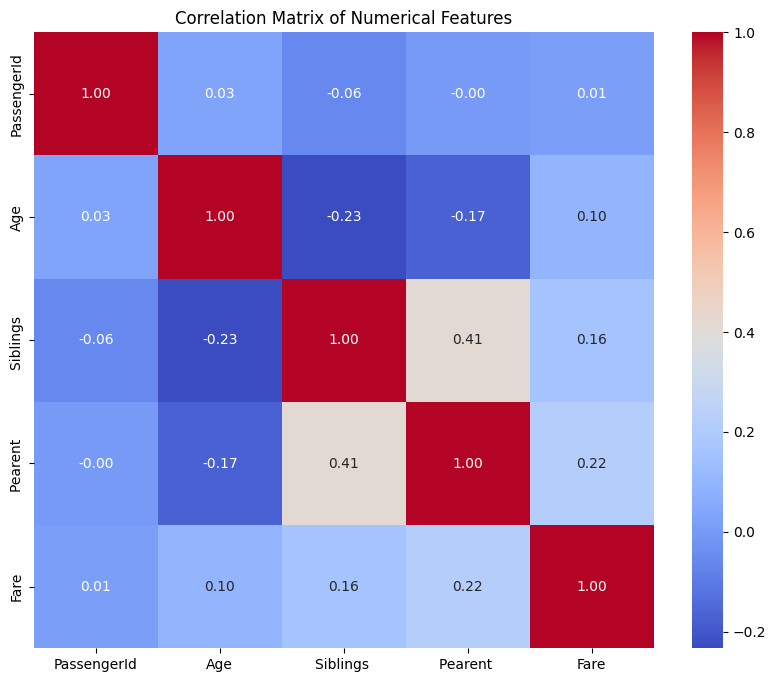

In [ ]:
# Define categorical features (cf)
cf = ['Survived', 'Pclass', 'Sex', 'Embarked']

# Numerical Features are features not in cf
nf = [i for i in df.columns if i not in cf and df[i].dtype != object]

# Calculate the correlation matrix
corr_matrix = df[nf].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()